In [1]:
require(ggplot2)
options(warn=-1)
library(ggplot2)
install.packages('ggalt')
library(ggalt)

Loading required package: ggplot2
Installing package into 'C:/Users/Michael/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggalt' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Michael\AppData\Local\Temp\RtmpgtRB3K\downloaded_packages


Registered S3 methods overwritten by 'ggalt':
  method                  from   
  grid.draw.absoluteGrob  ggplot2
  grobHeight.absoluteGrob ggplot2
  grobWidth.absoluteGrob  ggplot2
  grobX.absoluteGrob      ggplot2
  grobY.absoluteGrob      ggplot2


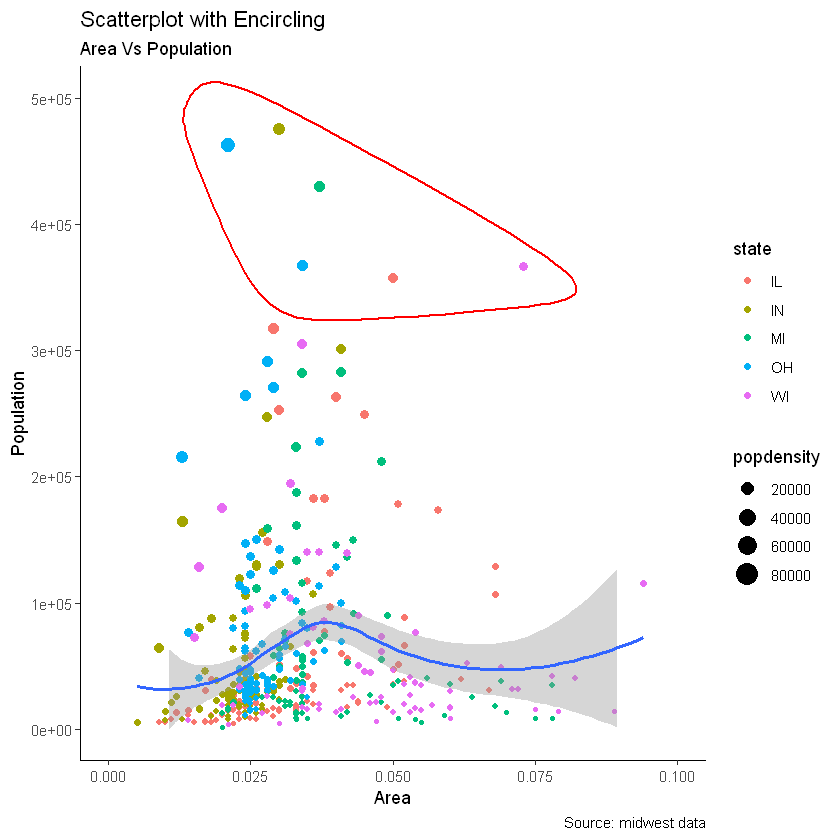

In [2]:


#ggplot is a powerful graphics library that operates on the idea of layering
#For example:
#let's say we want to create something like this (we'll work up to what everything means by the end of this notebook):
#You potentially could read/understand most of what's going on here already. That's the power of ggplot.

midwest_select <- midwest[
    midwest$poptotal > 350000 &
    midwest$poptotal <= 500000 &
    midwest$area > 0.01 &
    midwest$area < 0.1,
]

ggplot(midwest, aes(x = area, y = poptotal)) +
    geom_point(aes(col=state, size=popdensity))+
    geom_smooth(method="loess", se=T)+
    xlim(c(0, 0.1))+
    ylim(c(0, 500000))+
    geom_encircle( #ggalt::geom_encircle
        aes(x =area, y=poptotal),
        data=midwest_select,
        col="red",
        size=2,
        expand=0.08                  
    ) +
    labs(
        title="Scatterplot with Encircling",
        subtitle="Area Vs Population",
        x = "Area",
        y= "Population",
        caption="Source: midwest data"
    )+
    theme_bw()+
    theme(
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black")
    )


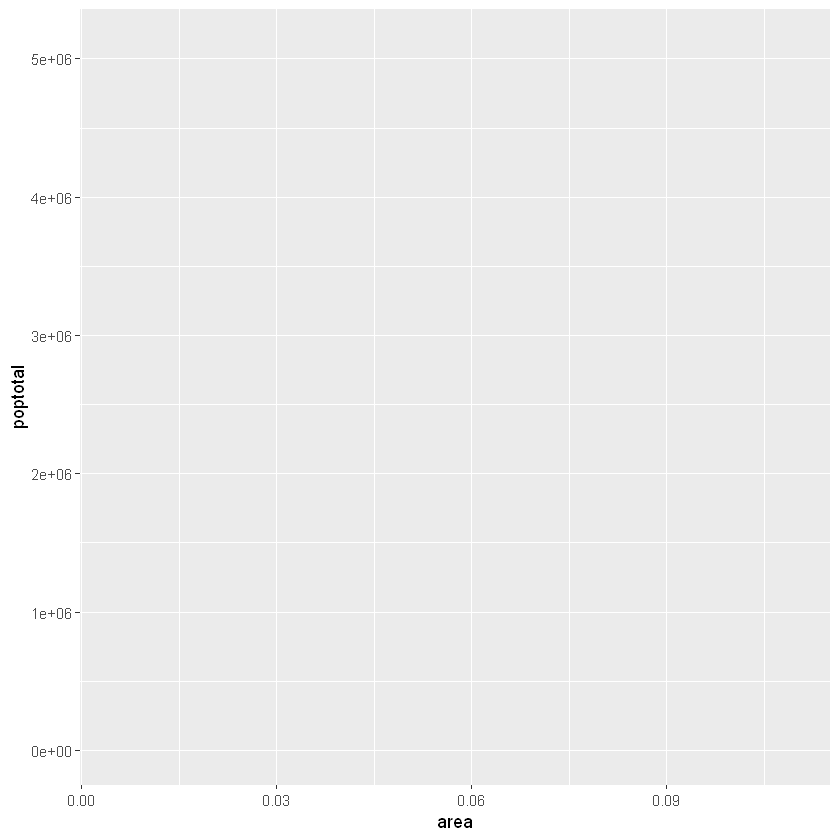

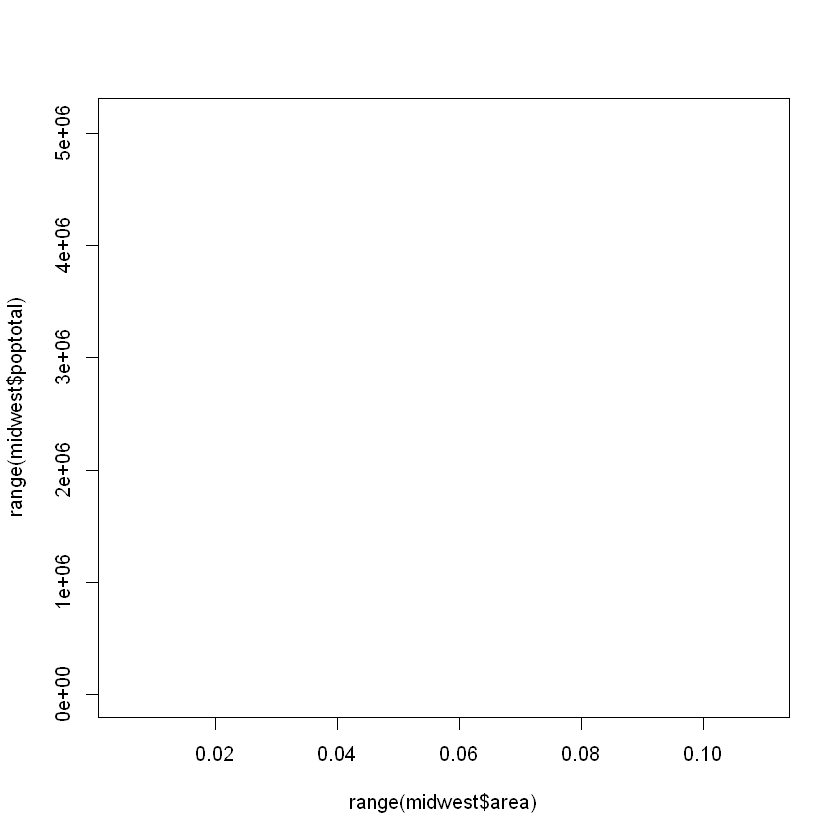

In [3]:
#We are going to go over factors here; if you've already looked at the tidyverse/dplyr
#jupyter notebook dataWrangling.ipynb then this will be review.

#the meat of ggplot is in the function call: aes()
#aes has two required arguments that will be argument 1 and 2 by default, so you don't have to name them
#aes(x = XDATA, y = YDATA) or aes(XDATA, YDATA) will always be required
#You create your first layer by calling ggplot(data, aes(XDATA, YDATA))
#For example, we called this in the above cell:

ggplot(data = midwest, aes(x = area, y = poptotal))
#This will create just a backbone for us
#If you recall in the basics lesson, we did a similar thing:
plot(x = range(midwest$area), y = range(midwest$poptotal), type='n' )
#The two main differences are syntax: Probably the ggplot line is easier to read
#And the default axis labels: one are the column names we called (area and poptotal)
#and the other is the function call that we did (range(X), range(Y))

#next cell

Begin Scatterplot

In [4]:
#I'll be using a different dataset here now:
#Fun thing about R and some packages, they have datasets that come loaded with them
#For example, mpg, msleep, or midwest!

#we're going to use the msleep dataset here
my_data <- msleep #Data_used
head(my_data) #Let's look at the dataset now to get an idea of what it looks like


name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


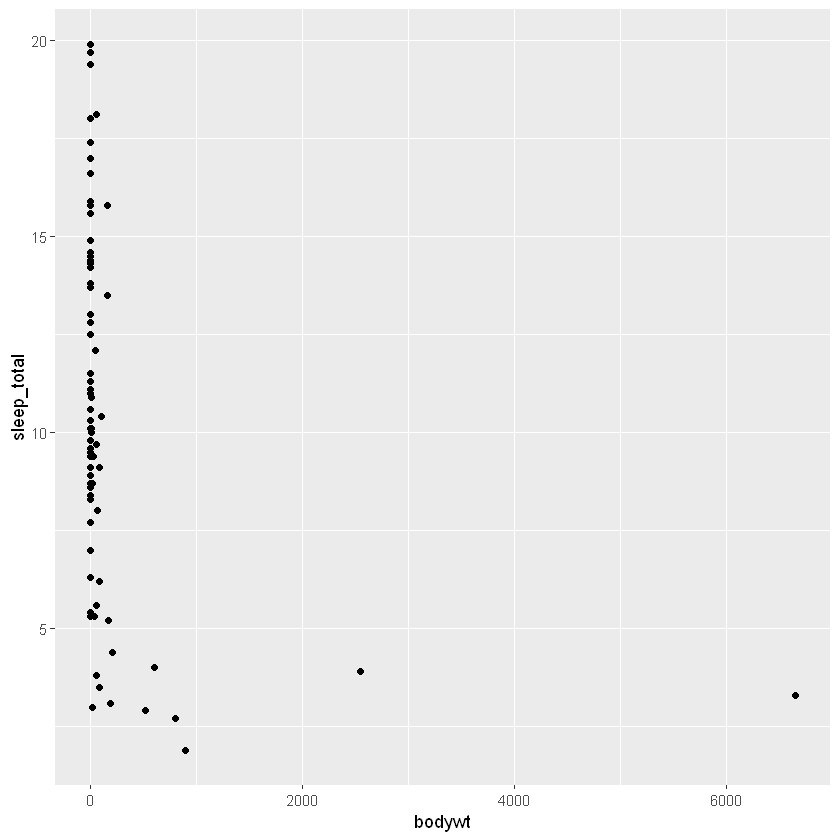

In [5]:
#Let's say we want to look at the relationship between body weight (bodywt) and sleep_total
#First we can make our base plot and we'll assign it to a variable name

my_first_ggplot <- ggplot(data=my_data, aes(x=bodywt, y= sleep_total))

#remember, we told ggplot what data we're using (my_data), and then the x and y variables we want in the aes()
#Now, let's make a scatter plot
#We can add what is called a geometry layer to our base plot. 
#We're making a scatter plot or a point plot, so this is called geom_point()

my_first_ggplot + geom_point()

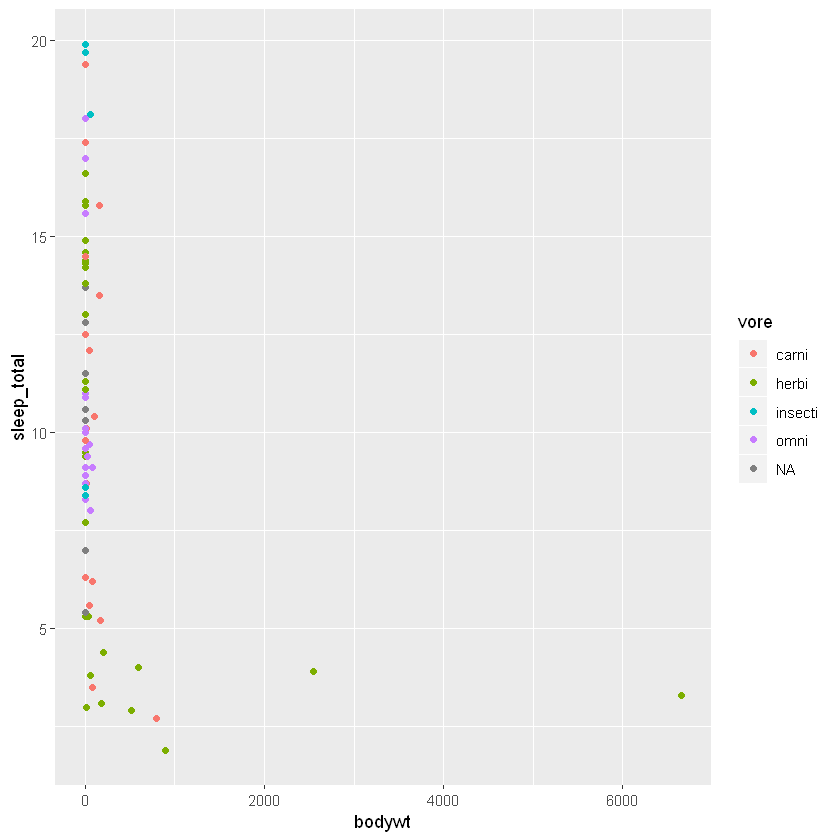

In [6]:
#Here's where factors become useful
#A factor is basically a categorical variable. 
#If you have a dataframe that contains strings, typically R will assume that those strings are factors
#This can result in some unintended consequences if you're not careful
#However, they are great for something like this:
#in our msleep data, there's a factor variable called "vore"
#This describes the type of diet that each animal has -- omnivore, carnivore, etc
#Let's say, we want to redo that correlation above with the data colored by the type of diet each animal has!


my_first_ggplot + geom_point(aes(col=vore)) 


#Notice, we've added the aesthetic col (color) equal to the column vore in geom_point.
#You can either do it in the ggplot() call or the geom_point call
#The factor acted as a categorical variable and ggplot interpreted it as something to assign a different color per level
#We'll talk about changing colors later
#Note again that we have an automatically generated legend to the right with a title

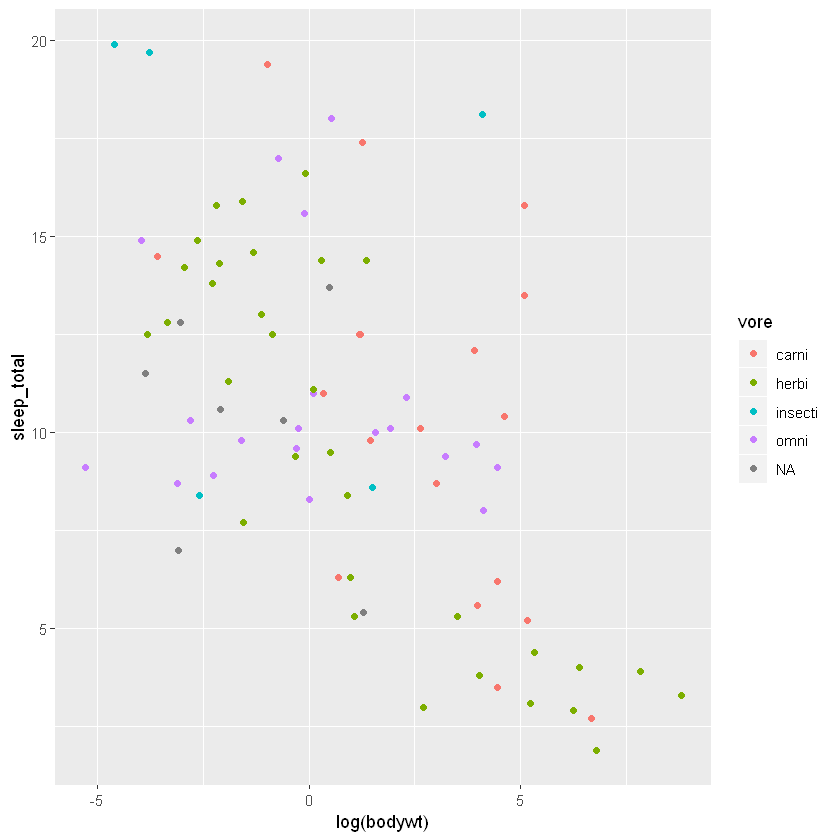

In [7]:
#Okay, our plot hasn't looked too too great since all of the data are fairly scrunched up together
#Let's log-transform the x-axis!

ggplot(data=msleep, aes(x=log(bodywt), y=sleep_total,col=vore))+
geom_point()


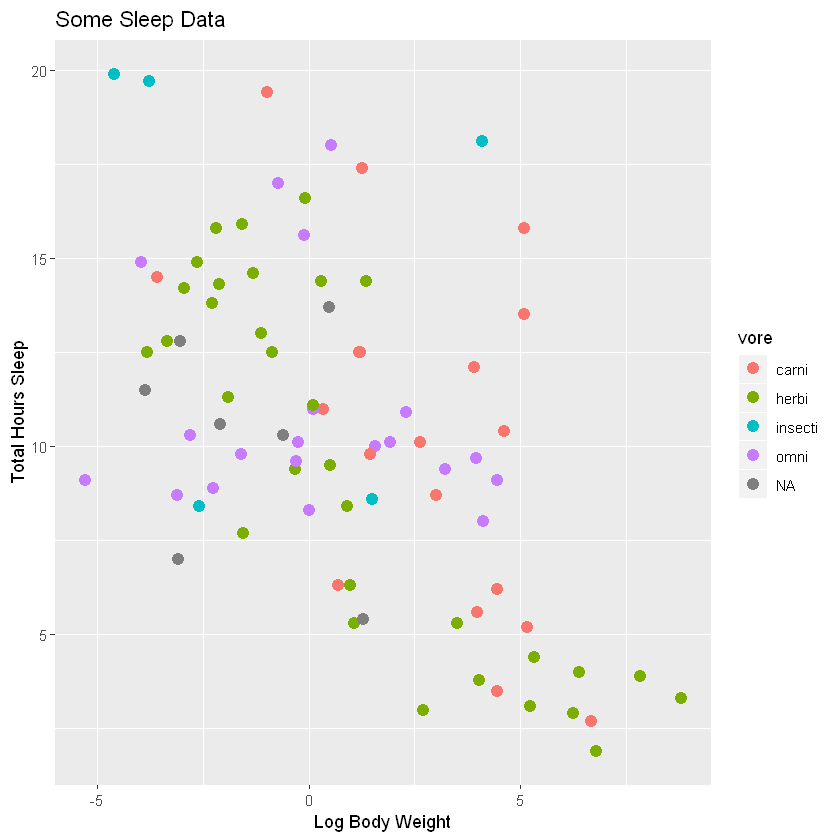

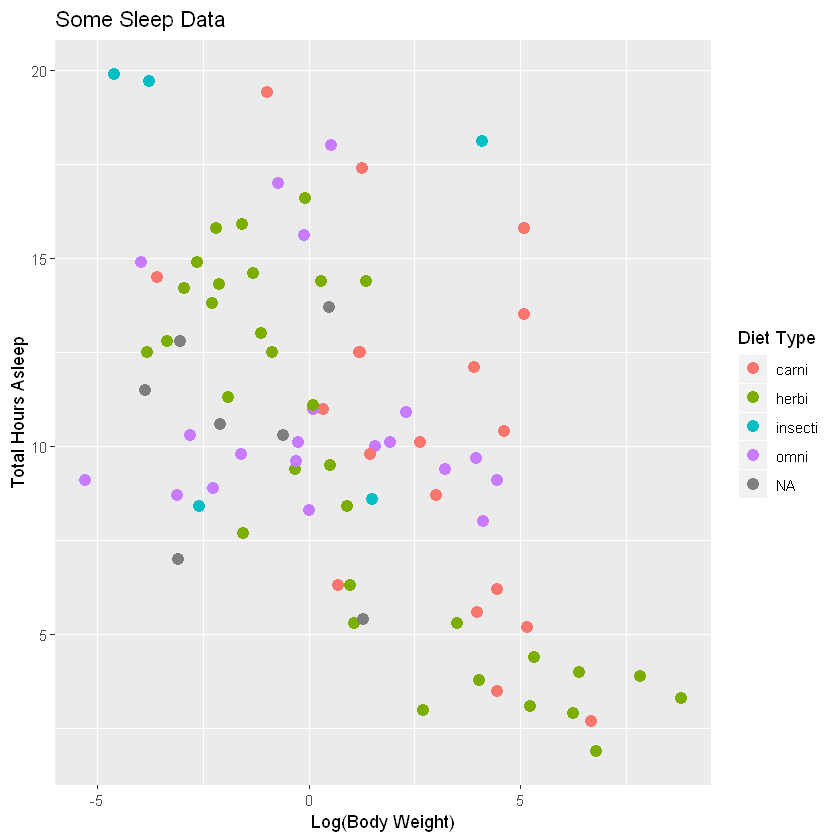

In [8]:
#Let's add a couple more things to this plot
#Let's add labels and increase the size of our points a bit

ggplot(my_data, aes(x = log(bodywt), y = sleep_total, col=vore))+ #same plot call as before
    geom_point(size=3)+ #change dot size with size argument
    xlab("Log Body Weight")+ #add X-axis label
    ylab("Total Hours Sleep")+ #add Y-axis label
    ggtitle("Some Sleep Data") #add Figure title

#doing the labels individually like that with xlab, ylab, and ggtitle is fine
#Or you can use the labs function instead

ggplot(my_data, aes(x = log(bodywt), y = sleep_total, col=vore))+
    geom_point(size=3)+
    labs(
        title="Some Sleep Data",
        x="Log(Body Weight)",
        y="Total Hours Asleep",
        color="Diet Type"
    )

#Choice is yours; I tend to prefer labs over individual

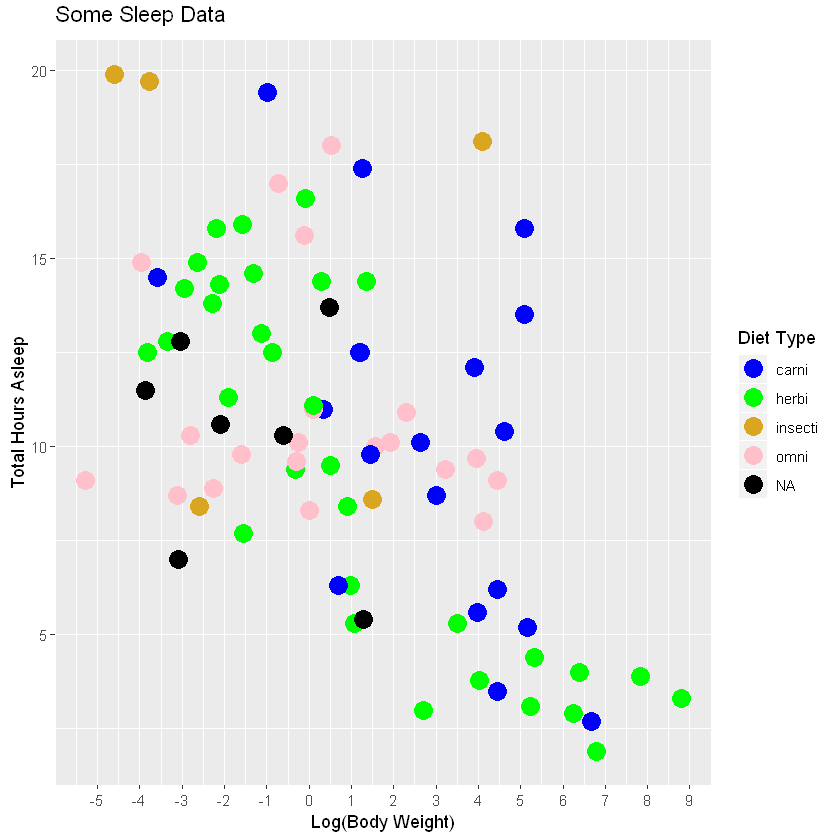

In [9]:
#Let's do a couple more things!
#I'm adding to this single plot increasingly

ggplot(my_data, aes(x=log(bodywt),y=sleep_total,col=vore))+ #Same call as before
    geom_point(size=5)+ #Same call
    scale_colour_manual(values=c("blue", "green", "goldenrod", "pink"), na.value = "black")+ #change Color palette
    #In this case, since we have "NA" as a factor, you have to separately define that color
    #If you have only complete cases, you can just skip that part
    #But, you have to know how many factors you have; or write a functions to pick n factors from a vector of colors
    #See below
    labs(
        title="Some Sleep Data",
        x="Log(Body Weight)",
        y="Total Hours Asleep",
        color="Diet Type"
    )+ #Same as before
    theme(plot.title=element_text(vjust=+2))+ #theme adjusts what the plot looks like
    #here we are adjust the title of the plot using element_text because it's text and vertically adjusting (vjust) 2 units up
    scale_x_continuous(breaks=-5:10) #Finally, we are setting the labels of the x-axis to be for every unit value between
    #-5 and 10
    #note that the names of the functions and parameters are fairly straightforward:
    #scale is the scale or axis, it's the x axis so, scale_x, and the x-axis is a continuous variable so
    #scale_x_contiuous
    #likewise you have scale_colour_manual above because we want to manually assign colors to our categories
    #if we wanted to edit our continuous y scale?

#regarding colors:
#Let's say you don't know how many factors/categorical variables you have in your dataset.
#Presumabley, you will, but in case you don't OR you're maybe making your code a bit more user-friendly
#so that someone else can read and understand what's happening (hard-coded values are not great)
#see if you can come up with a way to generate a line of code that will get the exact amount of unique
#colours from a vector of categorical variables
#hints: look up the functions unique(), colors(), and sample()
#an answer is in the next cell


In [10]:
#scale_color_manual(
#    values=sample(
#        colors(distinct=T),
#        length(
#            unique(FACTORVARS)
#        )
#    )
#)

#scale_color_manual like above
#use the values arg to set the values of the colors
#sample takes the form: sample(x, n, replace=FALSE, prob=NULL)
#where x is a vector to sample from, n is how many objects you want to sample,
#replace is with or without replacement (default is without replacement)
#and prob is if you want to have weighted chances of pulling things from x
#the x value in sample is colors(distinct=T)
#colors() gives you all color names available in R
#distinct is the vector of colors that are deemed distnct and able to be discerned from each other
#the n value is length(unique(Factor)); length gives the length of a vector and unique(x) gives a vector
#containing only unique values from x. 
#alternatively, one could just do nlevels(FACTOR) where nlevels() gives the number of levels in a set of factors
#that is the same as asking how many categorical variables there are

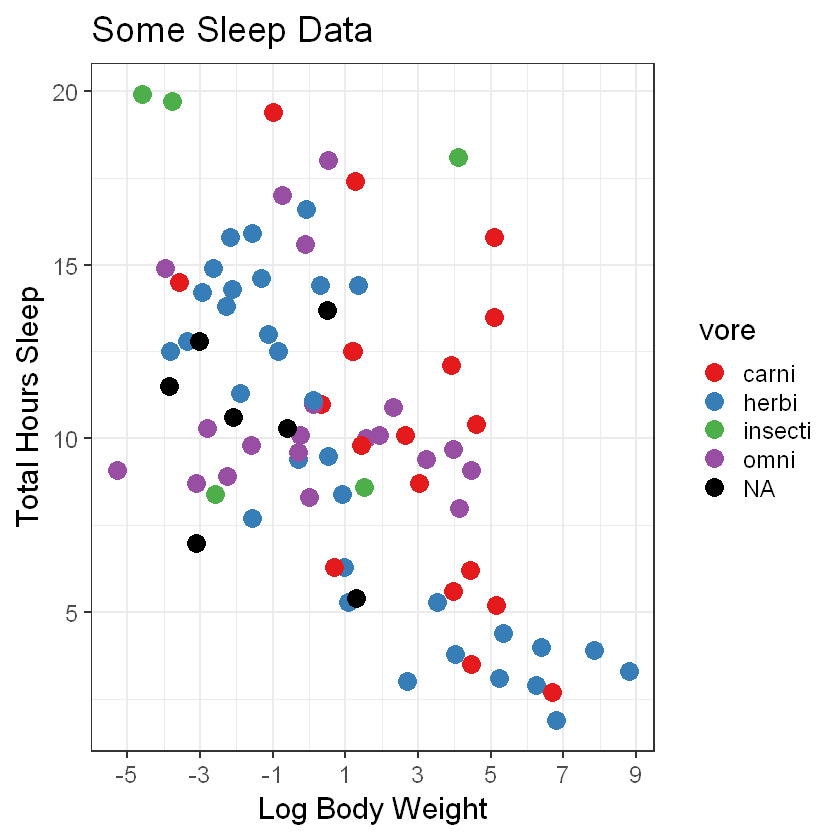

In [11]:
#That x-axis looks a little cluttered, the font seems a bit small, and that grey background seems a bit meh
#Don't you think?
ggplot(my_data, aes(x=log(bodywt),y=sleep_total,col=vore))+
    geom_point(size=5)+
    #instead of using scale_color_manual; there are some predefined color palettes
    #For example, RColorBrewer!
    scale_colour_brewer(palette="Set1", na.value="black")+
    ggtitle("Some Sleep Data")+
    xlab("Log Body Weight")+
    ylab("Total Hours Sleep")+
    theme(plot.title=element_text(vjust=+2))+
    #theme_bw makes the grey background go away
    #The arg base_size changes the font size
    theme_bw(base_size=18)+
    #We have the same scale_x_continuous call, but instead of using every digit between -5 and 10
    #We have every OTHER digit between -5 and 10
    scale_x_continuous(breaks=seq(-5,10,2))

#much cleaner!


Begin Stripchart:
categorical dot plot with jitter and summary statistic bars

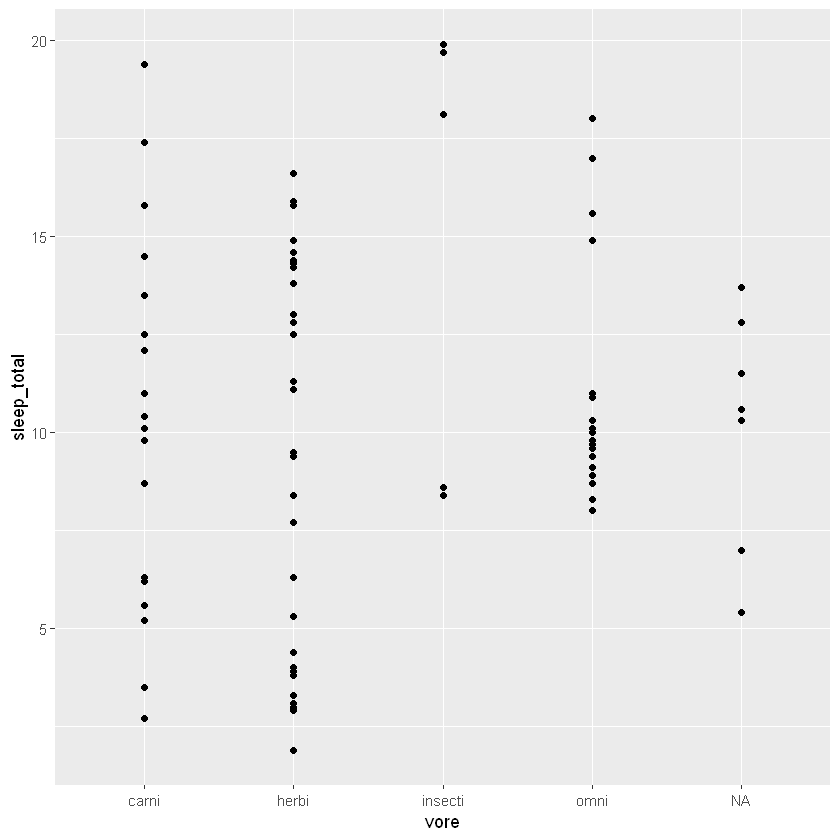

In [12]:
#Strip charts are basically categorical dot plots
#Remember when I said ggplot interprets factors as categorical variables?
#What if we put a categorical variable as our x variable?

ggplot(msleep, aes(vore, sleep_total))+ #categorical x, continuous y
    geom_point() #represent x and y with dots
#looks quite shitty; don't worry, we'll spice it up!

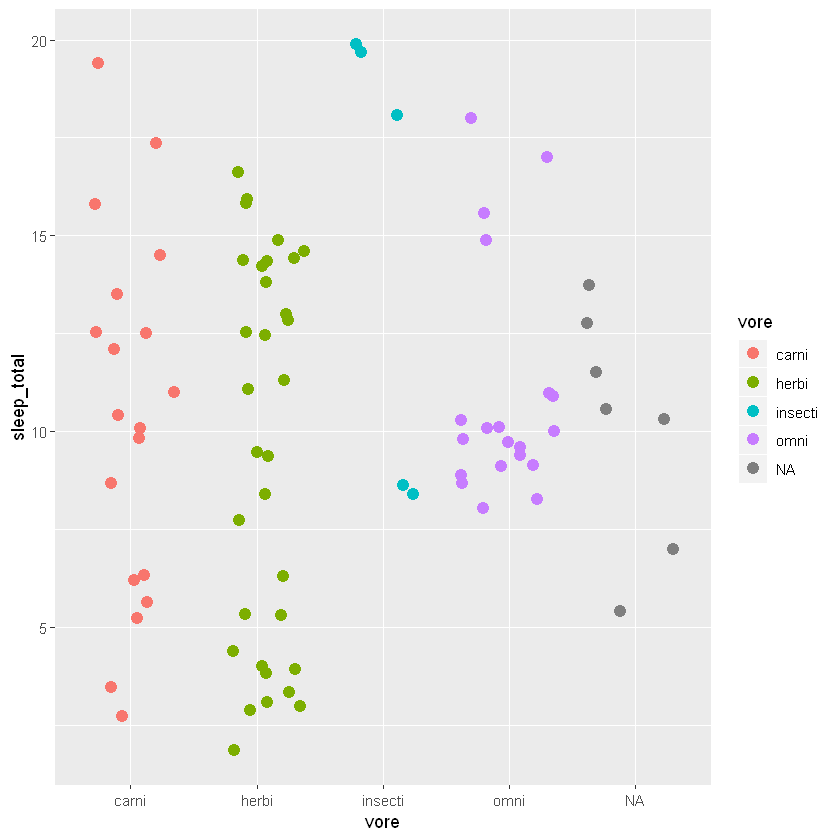

In [13]:
ggplot(msleep, aes(x=vore, y=sleep_total, col=vore))+
    geom_point(size=3, position="jitter") #bigger points; random noise to "x-pos"
    #jitter basically just adds a bit of flutter to the x value and allows the graph to look a bit less weird


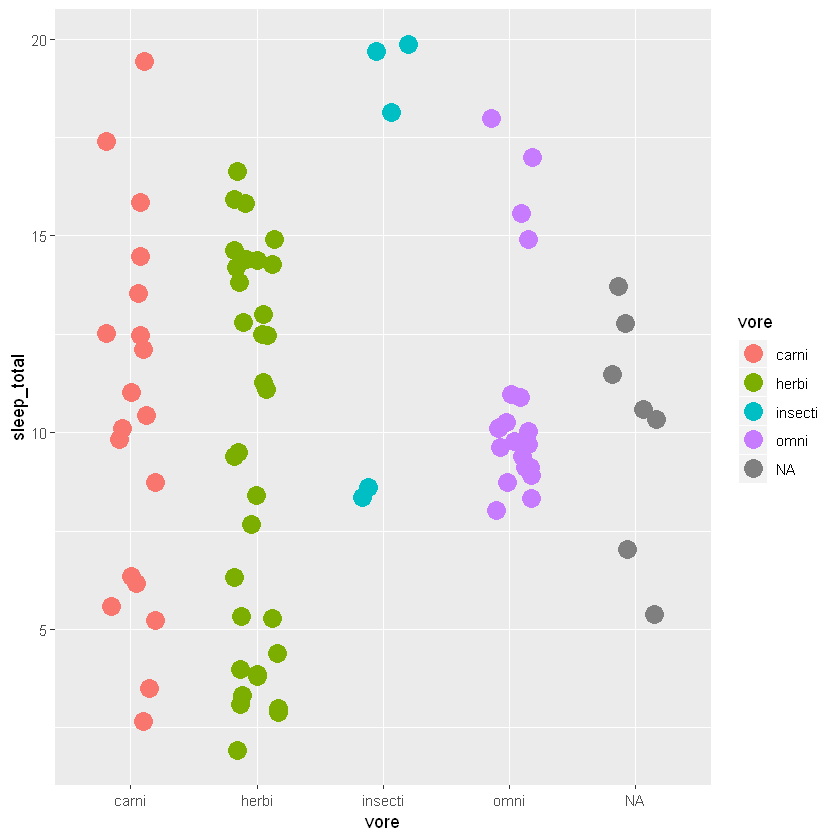

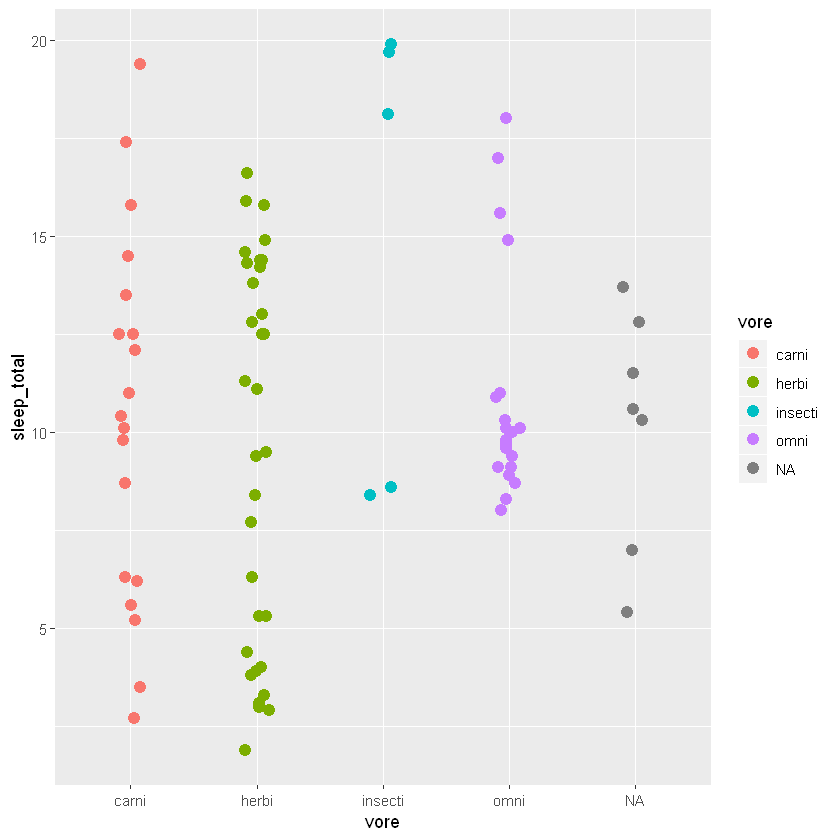

In [14]:
ggplot(msleep, aes(x=vore, y=sleep_total, col=vore))+
    geom_jitter(position=position_jitter(width = 0.2), size=5)

#Default geom_point(position="jitter") is probably going to add too much "jitter" to the data.
#To better control the amount of noise added to the data, instead of geom_point(), use geom_jitter(). 
#geom_jitter(position=position_jitter(width=w)) allows for the control
#of the amount of noise added on the x-value on the plot.
#position_jitter() is just a function so you could do this still in geom_point() as well
#another option is position_jitterdodge()

ggplot(msleep, aes(x = vore, y=sleep_total, col=vore))+
    geom_point(size=3, position=position_jitterdodge(jitter.width=0.2, dodge.width=1))
#play with dodge.width to see how the dodge.width affects your visualizations


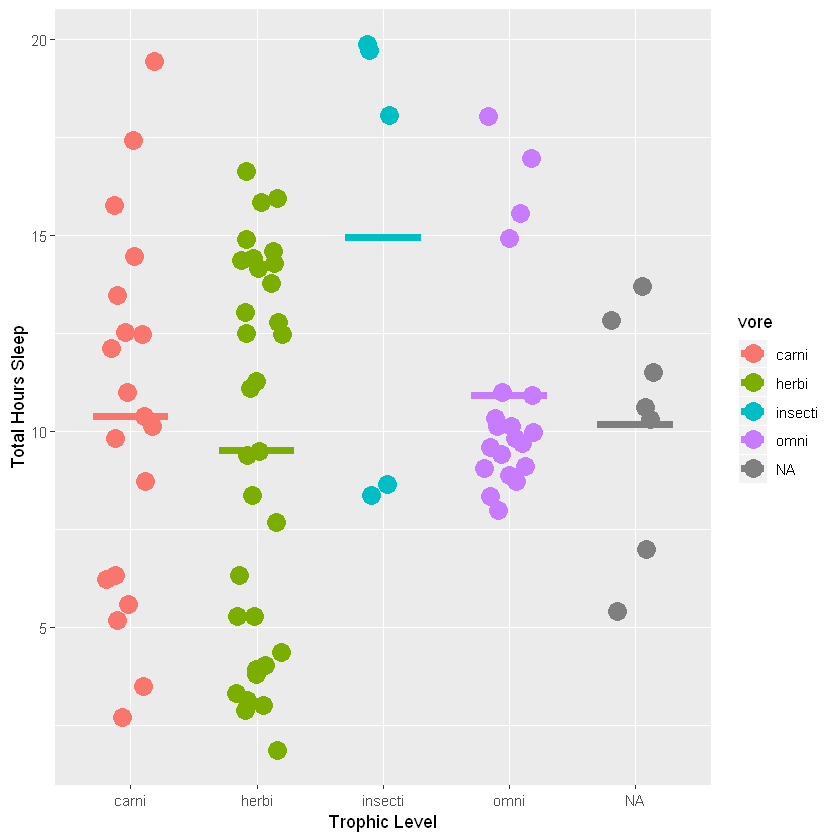

In [15]:
#We have this strip chart; what's the mean Sleep hours value for each trophic level?
#Well, there's a layer for that too!

ggplot(msleep, aes(x=vore, y=sleep_total, col=vore))+ #Same thing as before
    geom_jitter(position=position_jitter(width = 0.2), size=5)+ #Same thing
    #Now, we're adding a statistics layer (stat) and it is a summary value
    #so, stat_summary
    stat_summary(
        #fun.y: perform this function on the y-values of the aesthetic
        fun.y=mean,
        #new aesthetic defining ymin and ymax
        #the ..y.. means that R is supposed to calculate this value of y rather than look for it in
        #your workspace. E.g. let's say you had named a variable y, if you didn't have that ..y..
        #R would look for and use that variable y in your environment rather than calculate it
        #based on the fun.y argument above. It's odd, don't worry about it, you won't use/come
        #across it often
        aes(ymin=..y..,ymax=..y..),
        #Tell stat_summary how to visualize it
        #geom='errorbar' would be the same as using geom_errorbar(aes(x=vore, y=mean(sleep_total)))
        geom='errorbar',
        #sizing
        width=0.6,
        size=2
    )+ #add mean line
    ylab("Total Hours Sleep")+
    xlab("Trophic Level")


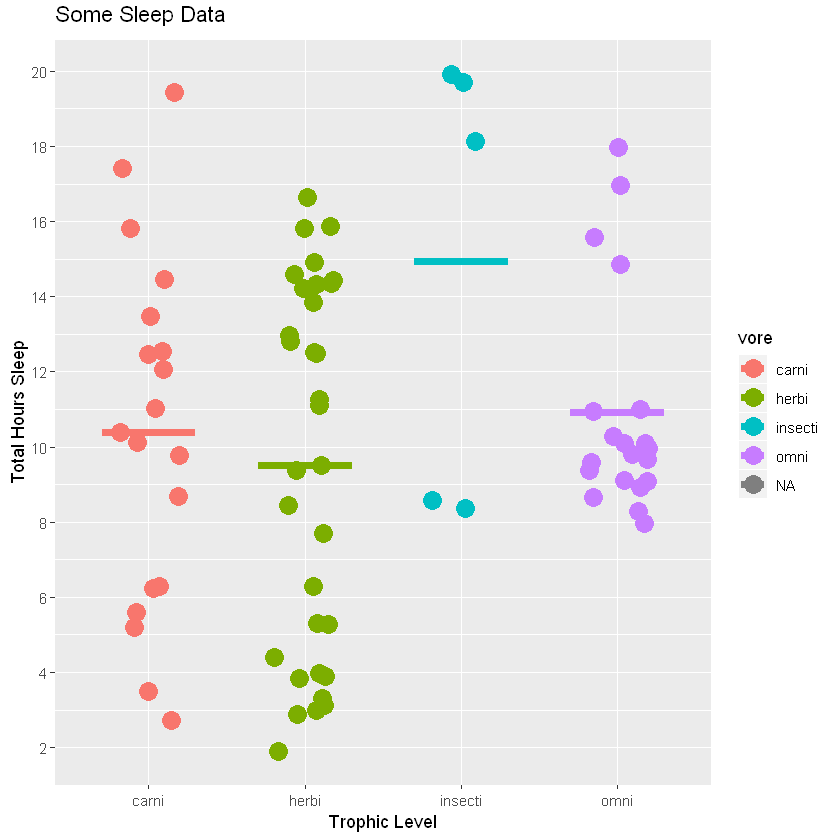

In [16]:
ggplot(msleep, aes(x=vore, y=sleep_total, col=vore))+ #Same thing as before
    geom_jitter(position=position_jitter(width = 0.2), size=5)+ #Same thing
    stat_summary(
        fun.y=mean,
        aes(ymin=..y..,ymax=..y..),
        geom='errorbar',
        width=0.6,
        size=2
    )+
    ylab("Total Hours Sleep")+
    xlab("Trophic Level")+
    scale_x_discrete(limits=c('carni','herbi','insecti','omni'))+ #Remove NA factor
    #Note this time, it's scale_x_discrete; because we're using a discrete variable for x!
    ggtitle("Some Sleep Data")+
    theme(plot.title=element_text(vjust=+2))+
    #We've seen this form before, except now we're editing the y-axis instead of the x-axis
    scale_y_continuous(breaks=seq(0,20,2))


In [17]:
#New dataset -- I've provided this in the github too if you want to play around with it
festival.data<-read.table("./dataFiles/DownloadFestival.dat.txt",sep="\t",header=T)
head(festival.data)

ticknumb,gender,day1,day2,day3
<int>,<fct>,<dbl>,<dbl>,<dbl>
2111,Male,2.64,1.35,1.61
2229,Female,0.97,1.41,0.29
2338,Male,0.84,NA,NA
2384,Female,3.03,NA,NA
2401,Female,0.88,0.08,NA
2405,Male,0.85,NA,NA


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


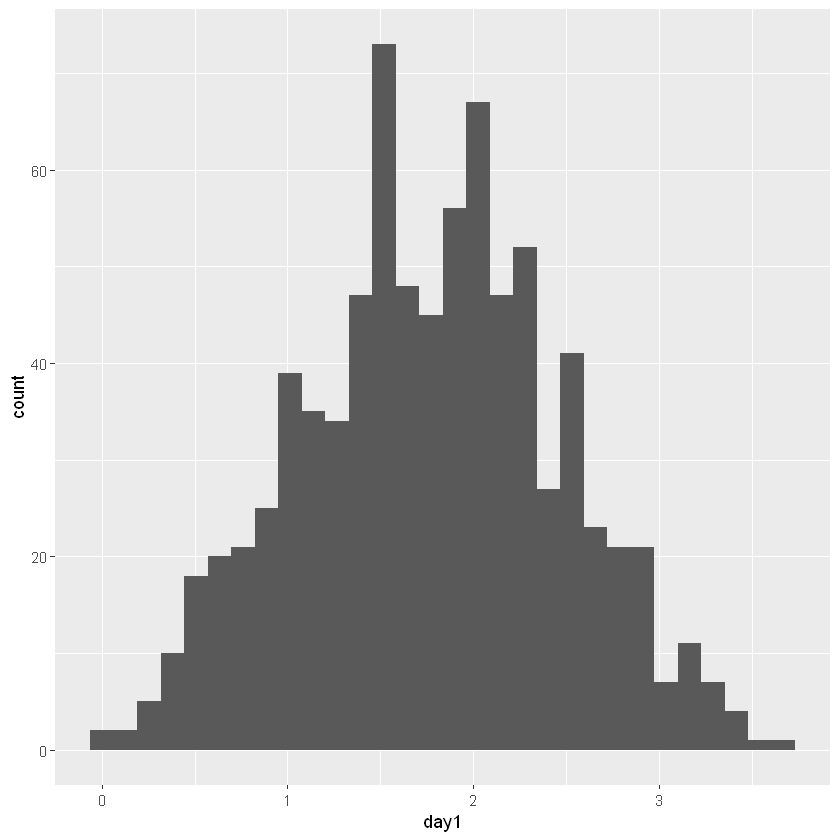

In [18]:
ggplot(festival.data, aes(day1))+
    geom_histogram()


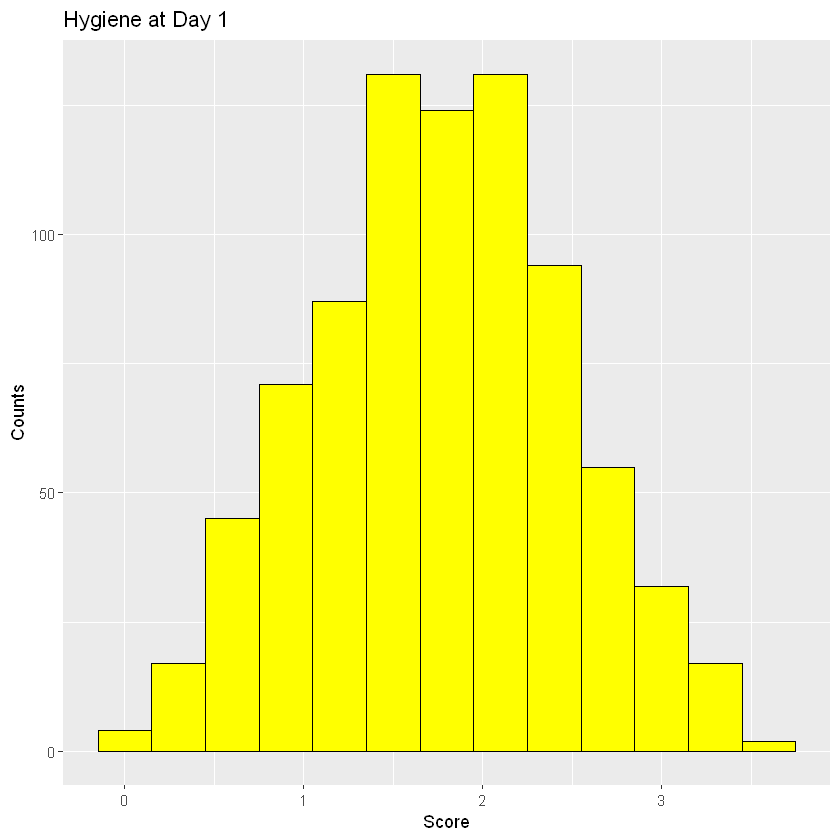

In [39]:
#You'll note the warning about binwidth; generally you can just ignore that.
#If you want to specify a binwidth or number of bins, you can with binwidth or bins args

ggplot(festival.data, aes(day1))+
    #Use binwidth arg to control visualization
    #color and fill refer to different things here
    #color: outline; fill: inside
    geom_histogram(binwidth=0.3, color="black", fill="yellow")+
    labs(x="Score", y="Counts")+
    ggtitle("Hygiene at Day 1")


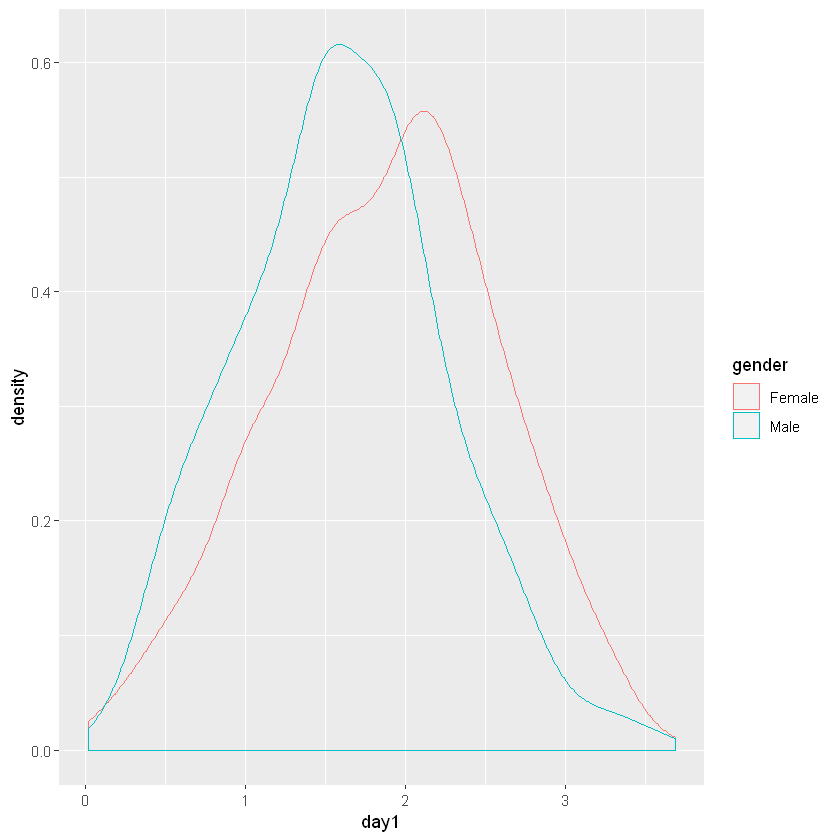

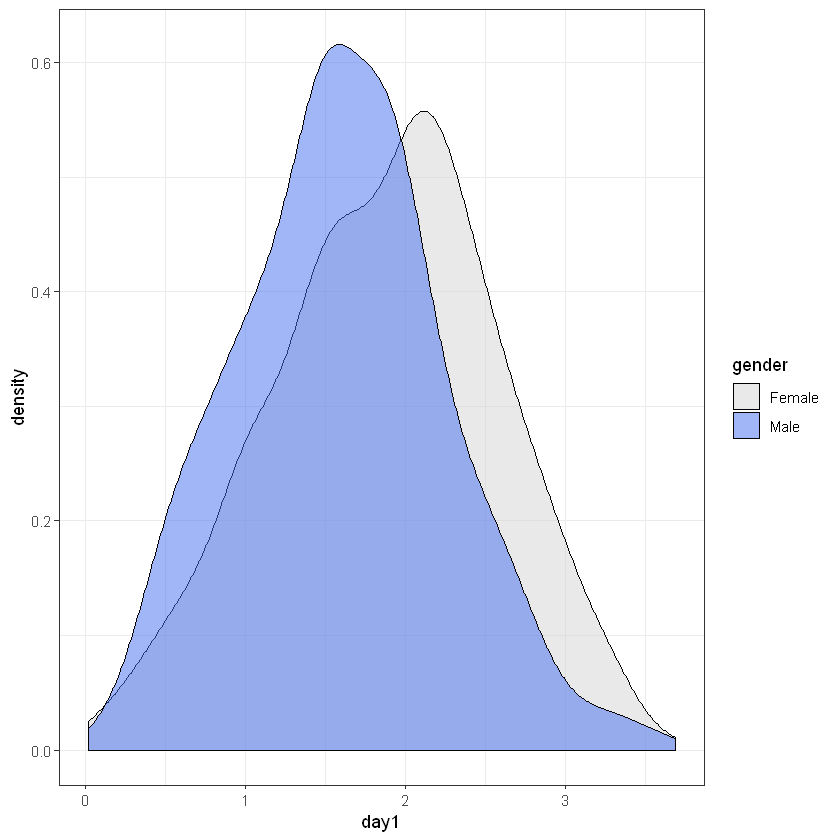

In [44]:
#histograms are rather grainy ways of looking at the data. What if we do a density plot instead?
#let's divde the data up by gender too

ggplot(festival.data, aes(x = day1, col=gender))+
    geom_density()

#hmm, that didn't go as planned; we wanted to have our plot filled in!
#remember, color and fill mean different things!
#Let's get a bit fancy too and dynamically generate our colors.
#This is going to use something from the functions lesson, but I'm just going to create a quick function

create_plot_colors <- function(factor_vector, use_distinct = T) {
    #arguments for this function is the vector containing your categorical variable
    #use_distinct is an optional variable if you want to have distinct colors (default)
    #or not.
    factor_vector <- as.factor(factor_vector) #circumvents input data.type
    num_col <- nlevels(factor_vector) #Gets number of colors to make
    sample(colors(distinct = use_distinct), num_col) #returns vector of colors
}

#call function using gender variable from festival data
#Note that since this is random, every time you call it it will be different; so be careful.
#Again, another option is to check out something like color brewer.
#Also, be cognizant of color blind folx when making figures!
#This is also not a great way to generate colors, just something to show you for fun.
colors_for_density <- create_plot_colors(festival.data$gender) 

ggplot(festival.data, aes(x = day1, fill=gender))+
    #only new arg here is `alpha`
    #`alpha` = [0, 1] is the amount of transparency
    geom_density(col='black', alpha = 0.5)+
    #now let's use our dynamically generated function!
    scale_fill_manual(values=colors_for_density)+
    #making prettier
    theme_bw()


In [40]:
#Let's take a look at our data really quick
#head will just put the first few (default: n = 6) rows of an object
head(festival.data)

#Notice that we have a categorical variable already with gender
#But also, there is another variable that we could make categorical too
#columns 3:5 could become two columns with one being the day value and the second being the score
#Let's load a library to help us change the data!

#if you haven't installed this package, you will need to do so with
#install.packages('reshape2') then load up with the command below
library(reshape2)

ticknumb,gender,day1,day2,day3
<int>,<fct>,<dbl>,<dbl>,<dbl>
2111,Male,2.64,1.35,1.61
2229,Female,0.97,1.41,0.29
2338,Male,0.84,NA,NA
2384,Female,3.03,NA,NA
2401,Female,0.88,0.08,NA
2405,Male,0.85,NA,NA


In [21]:
#the function we want from the reshape2 library is called melt.
#Basically, the melt function has two parameters:
#The data you want to "melt", and the id.vars that you want to keep the same.
#The rest of the columns will have their names turned into categorical variables and their values put into
#a separate column.
#It's hard to explain, so let's see an example by turning the days into a single cat-var


festival.data.stack <- melt(festival.data, id.vars = c("ticknumb","gender"))
head(festival.data.stack)
#See, now the variable column consists of a factor that is the original day column where the value column comes from

ticknumb,gender,variable,value
<int>,<fct>,<fct>,<dbl>
2111,Male,day1,2.64
2229,Female,day1,0.97
2338,Male,day1,0.84
2384,Female,day1,3.03
2401,Female,day1,0.88
2405,Male,day1,0.85


In [22]:
#Let's do some renaming to get away from the "variable", "value" convention
colnames(festival.data.stack)<-c("ticknumb","gender","day","score")
head(festival.data.stack)

ticknumb,gender,day,score
<int>,<fct>,<fct>,<dbl>
2111,Male,day1,2.64
2229,Female,day1,0.97
2338,Male,day1,0.84
2384,Female,day1,3.03
2401,Female,day1,0.88
2405,Male,day1,0.85


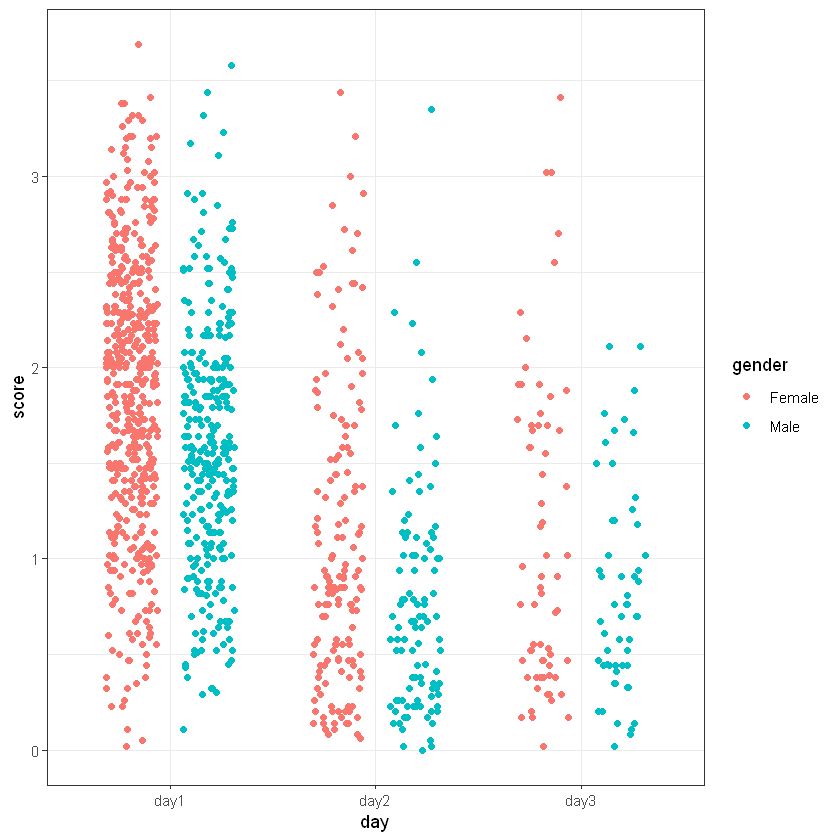

In [78]:
#Okay, what can you do with it. Well, the normal things!

ggplot(festival.data.stack, aes(x = day, y = score, col = gender))+
    geom_point(position = position_jitterdodge(jitter.width = 0.5))+
    theme_bw()

#This might seem a bit cluttered let's visualize this a different way

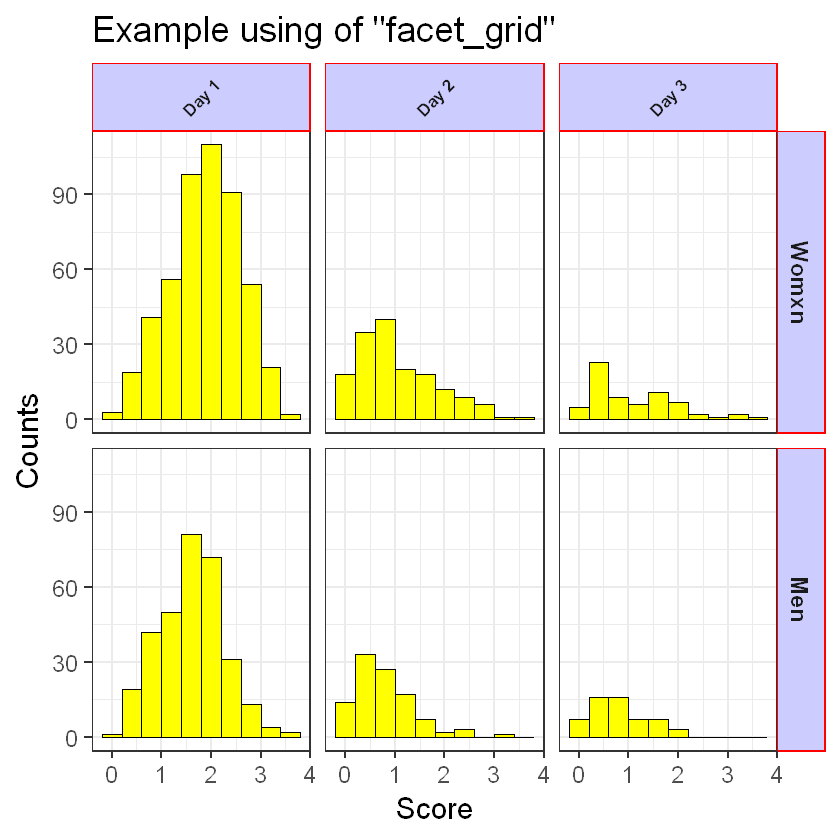

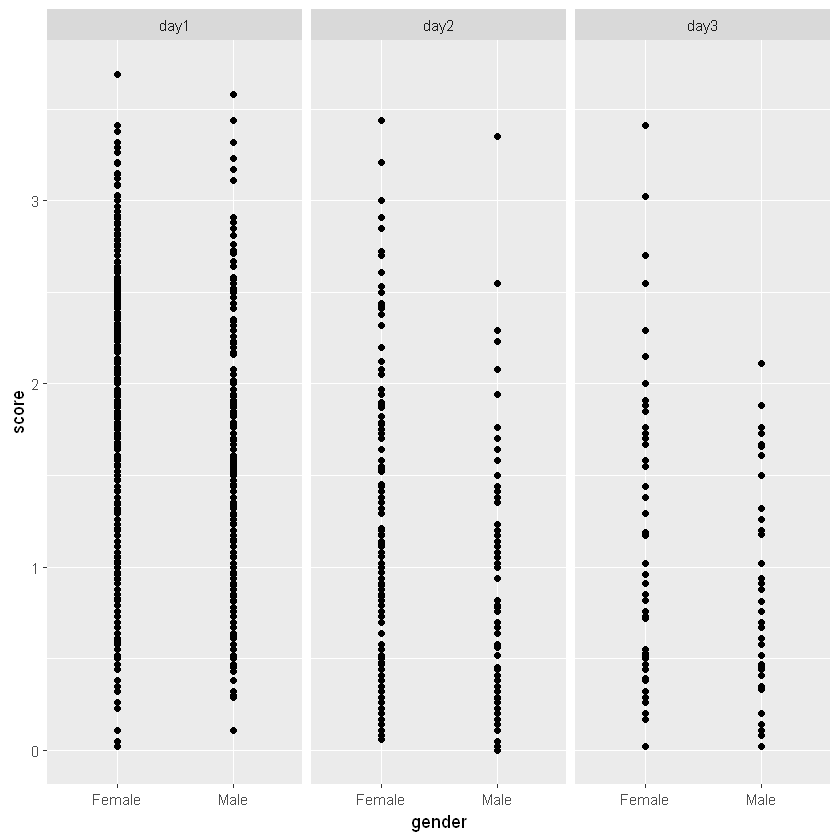

In [57]:
#we're going to introducing faceting.
#Again, co-opting the use of factors we can make an m x n grid of figures that are separated by some factor

#First, let's make a named vector (basically a vector with dimension names) to help with labelling
#We'll use these shortly

facet1_names<-c(
    #Factor level = label output
    Female="Womxn",
    Male="Men"
)
facet2_names<-c(
    #factor level = label output
    day1="Day 1",
    day2="Day 2",
    day3="Day 3"
)

ggplot(festival.data.stack, aes(score))+ #implicit x = score in aes()
    geom_histogram(binwidth=0.4, color="black", fill="yellow")+ #histogram again
    labs(
        #Look at the title of the figure below and see if you understand the use of the \ here!
        #if you don't get it, google "escaping characters"
        title = "Example using of \"facet_grid\"",
        x="Score",
        y="Counts"
    )+
    #facet_grid is easier to show rather than explain
    #but it basically takes an expression (see the statistical analysis notebook for more on this)
    #and makes a matrix of figures
    facet_grid(
        #read basically as "Gender as a function of day"
        gender~day,
        #here is where we use our helper vectors from before!
        #Look at the output to see how they interact
        labeller=labeller(gender=facet1_names, day=facet2_names)
    )+
    #adjusting the theme
    theme_bw(base_size=18)+
    theme(
        #strip is the facet label (whereas axis.text.x would refer to the x axis as a whole)
        #the arguments here are pretty self explanatory
        strip.text.x = element_text(size=10, angle=45, face="bold"),
        strip.text.y = element_text(size=14, face="bold"),
        strip.background = element_rect(colour="red", fill="#CCCCFF")
    )

#Try and see if you can link all of the elements of the output to what's happening in the code above. 
#I'm going to be a bit more sparse with commenting from here on in
#You should have a pretty good idea of the ggplot2 syntax and its patterns

#Let's edit our data to remove any missing data points
#remember the `!` means negation, so !is.na() would be the opposite of is.na()
#is.na() asks if the value of the vector is NA (i.e. missing)
#this goes back to the basics notes
festival.data.stack.edit <- festival.data.stack[
    !is.na(festival.data.stack$score),
]

ggplot(festival.data.stack.edit, aes(x=gender,y=score))+
    geom_point()+
    #I don't have to have an n x m grid, I could just have an 1~m or n~1 grid by doing ~facet or facet~ respectively
    facet_grid(~day)







In [61]:
#Let's make that second plot a bit more palatable to look at, yeah?

#Try and do this on your own before looking at the next cell. 
#Recreate the previous figure (facet_grid(~day)) with the following conditions:
#Have the facet label background be lightblue (that's not a typo, it's a hint),
#the facet label be "Day 1", "Day 2", "Day 3"
#allow us to see each point more clearly instead of in a single line
#color by gender
#Relabel the axes to be "Score" and "Gender" instead of "score" and "gender"



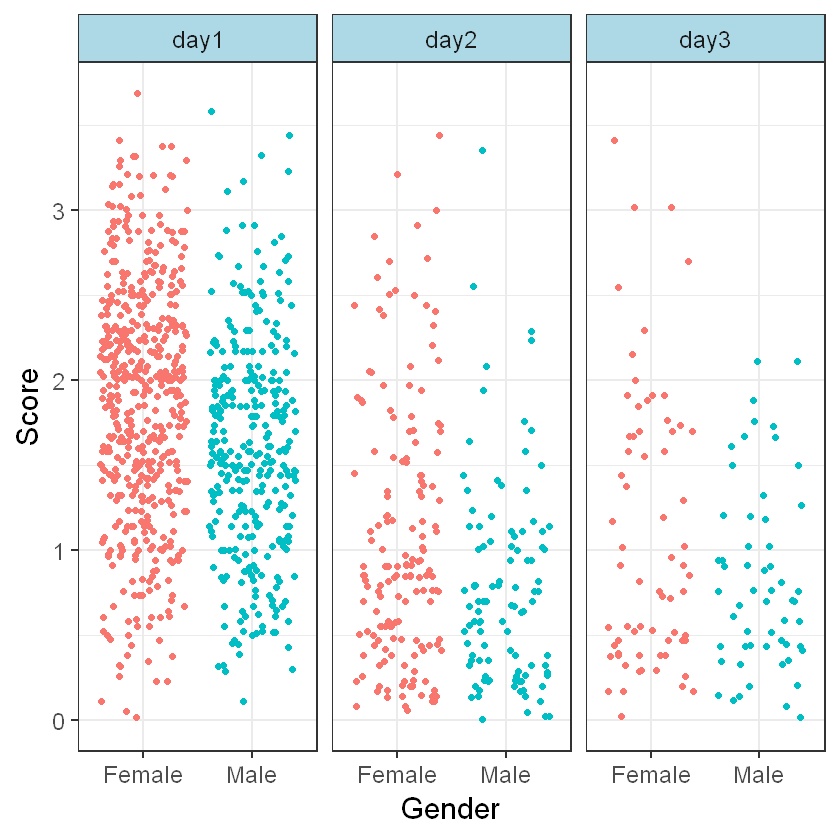

In [63]:
ggplot(festival.data.stack.edit, aes(x=gender,y=score, col=gender))+
    geom_point(position="jitter")+
    facet_grid(~day, labeller = labeller(facet2_names))+
    labs(
        x="Gender",
        y="Score"
    )+
    scale_color_discrete(guide=F)+
    theme_bw(base_size=18)+
    theme(
        strip.background=element_rect(fill = "lightblue")
    )

#The only new thing here is scale_color_discrete(guide=F)
#Since the gender labels are already colored and there is a label underneath, it's redundant
#So, I eliminated it. Note here that you have to use scale_color_discrete
#scale_color_manual requires values
#another option is to use guides(col=F)
#You can still provide custom colors via scale_color_manual(values=c()) in either scenario


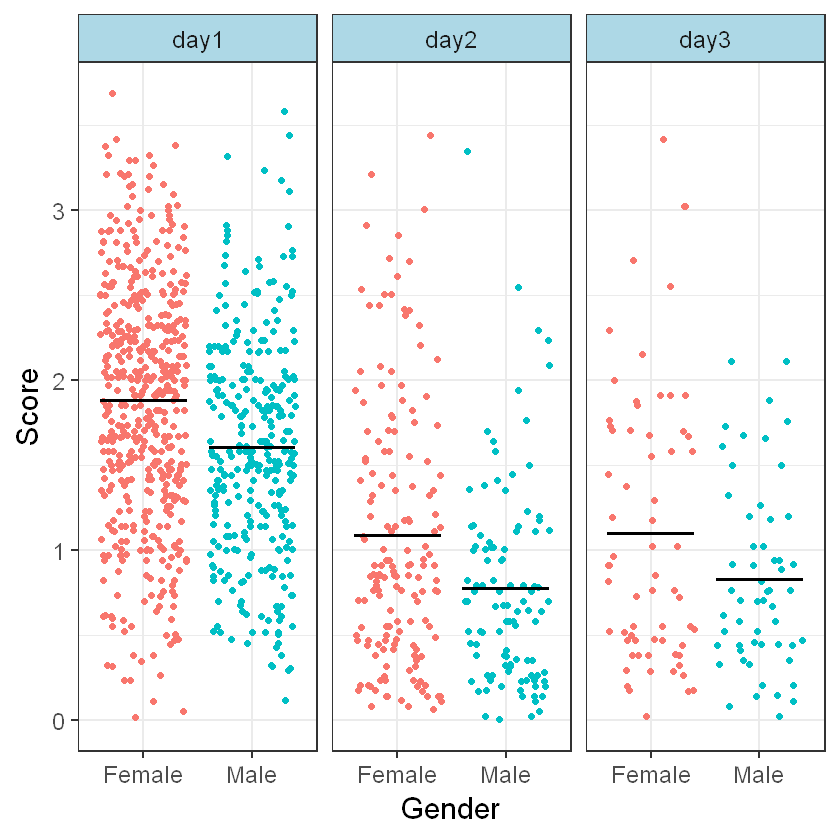

In [65]:
#ggplot will implicitly understand to apply statistical summaries to the facet

#Ordering doesn't really matter (i.e. stat_summary before facet_grid vs facet_grid before stat_summary)
#However, it makes more sense to read the latter
#We've seen everything here before.
#Just combining some earlier stuff with recent things
ggplot(festival.data.stack.edit, aes(x=gender,y=score, col=gender))+
    geom_point(position="jitter")+
    facet_grid(~day, labeller = labeller(facet2_names))+
    stat_summary(
            fun.y=mean, 
            aes(ymin=..y..,ymax=..y..),
            geom='errorbar',
            width=0.8,
            size=1,
            col="black"
    )+
    labs(
        x="Gender",
        y="Score"
    )+
    scale_color_discrete(guide=F)+
    theme_bw(base_size=18)+
    theme(
        strip.background=element_rect(fill = "lightblue")
    )




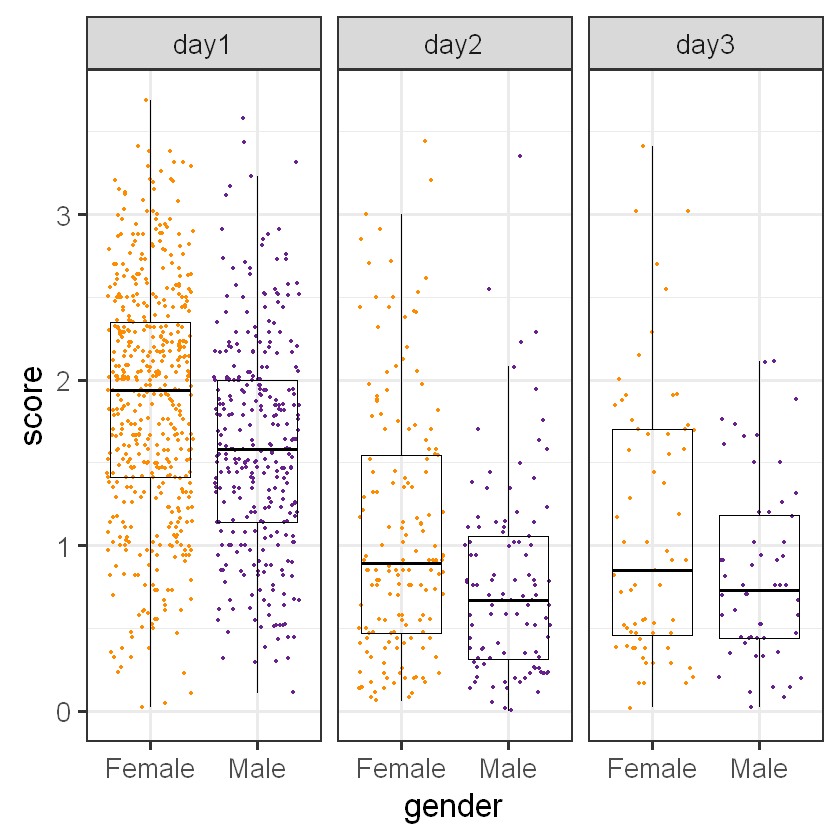

In [66]:
#a common data visualizer that I haven't shown you yet is a boxplot
#if you guessed you can add a boxplot layer using geom_boxplot(), you'd be correct!
#And that means you're getting the hang of ggplot syntax :)
#So, let's put a box plot on top of our point data too

ggplot(festival.data.stack.edit, aes(gender,score,col=gender))+
    geom_point(position="jitter", size=0.8)+
    theme_bw(base_size=20)+
    facet_grid(~day)+
    scale_color_manual(values=c("darkorange","darkorchid4"))+
    guides(col=F)+
    #Remember what alpha is?
    geom_boxplot(alpha=0, col="black")

#I've left off a couple of the accoutrements in terms of labelling etc, 
#but you can of course add them yourself!


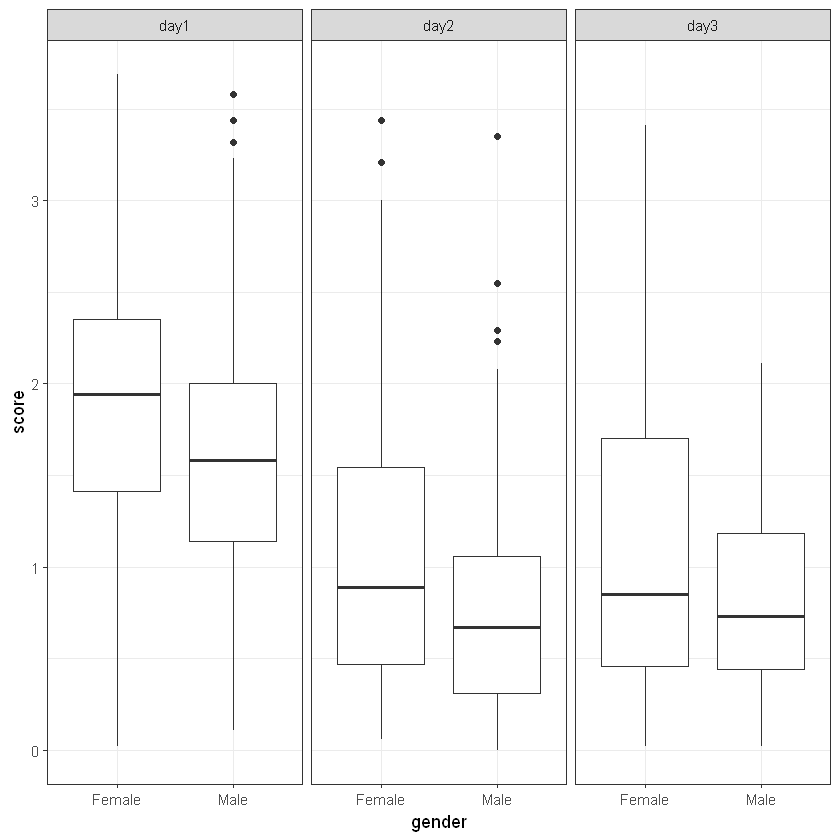

In [72]:
ggplot(festival.data.stack.edit, aes(x=gender, y=score))+
    geom_boxplot()+
    facet_grid(~day)+
    theme_bw()

#stripping even further, we can just use a boxplot
#N.B. I don't recommend ever *just* using a boxplot.
#Point of fact, I don't think most journals will let you use just a boxplot

#Don't worry about the data points that are showing. Those are outliers calculated by R
#if you're interested in how it's calculated, look at ?boxplot.stats


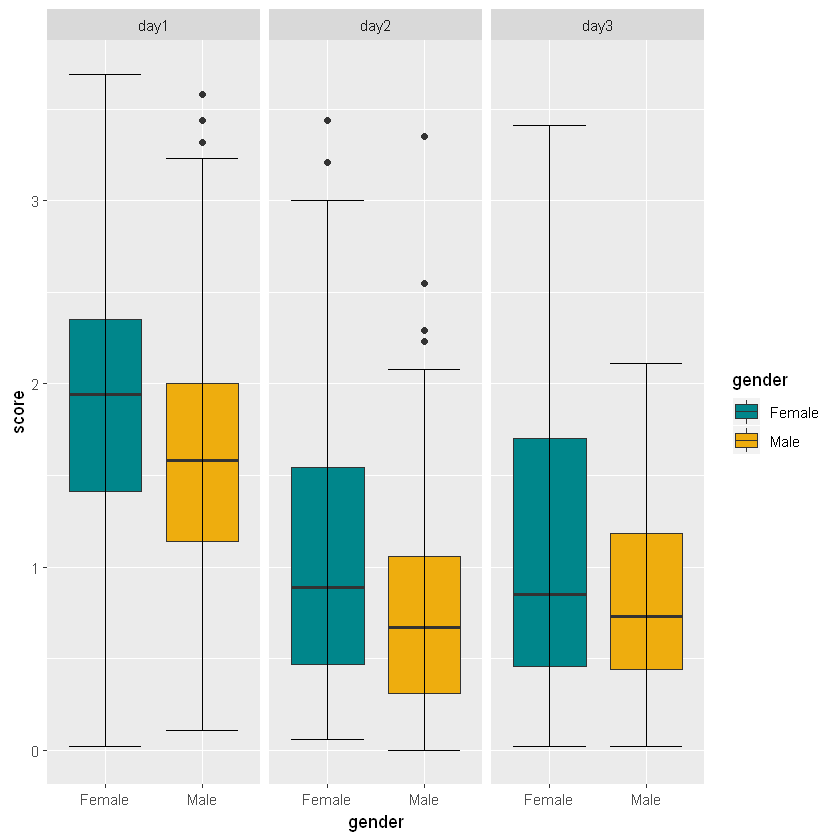

In [29]:
#You can use stat_boxplot(geom="errorbar") to add the horizontal line at the ends of the whiskers if you'd like!
ggplot(festival.data.stack.edit, aes(x=gender,y=score, fill=gender))+
    geom_boxplot()+
    stat_boxplot(geom="errorbar")+
    scale_fill_manual(values=c("turquoise4","darkgoldenrod2"))+
    facet_grid(~day)


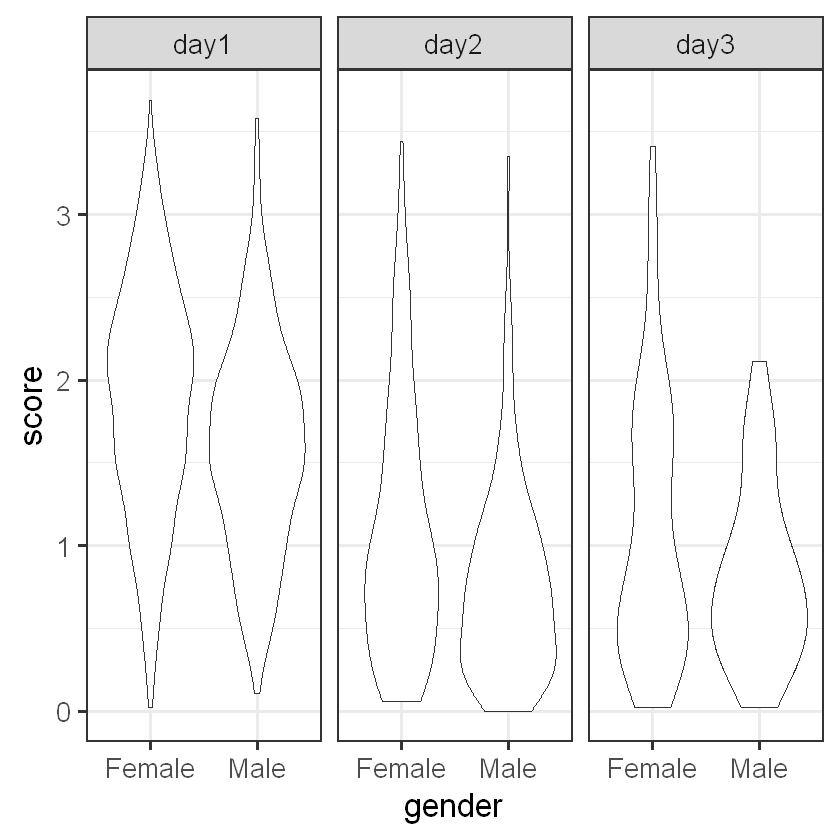

In [31]:
#Perhaps a more aesthetic view: violin plot

ggplot(festival.data.stack.edit,aes(x=gender,y=score))+
    geom_violin()+
    facet_grid(~day)+
    theme_bw(base_size=20)


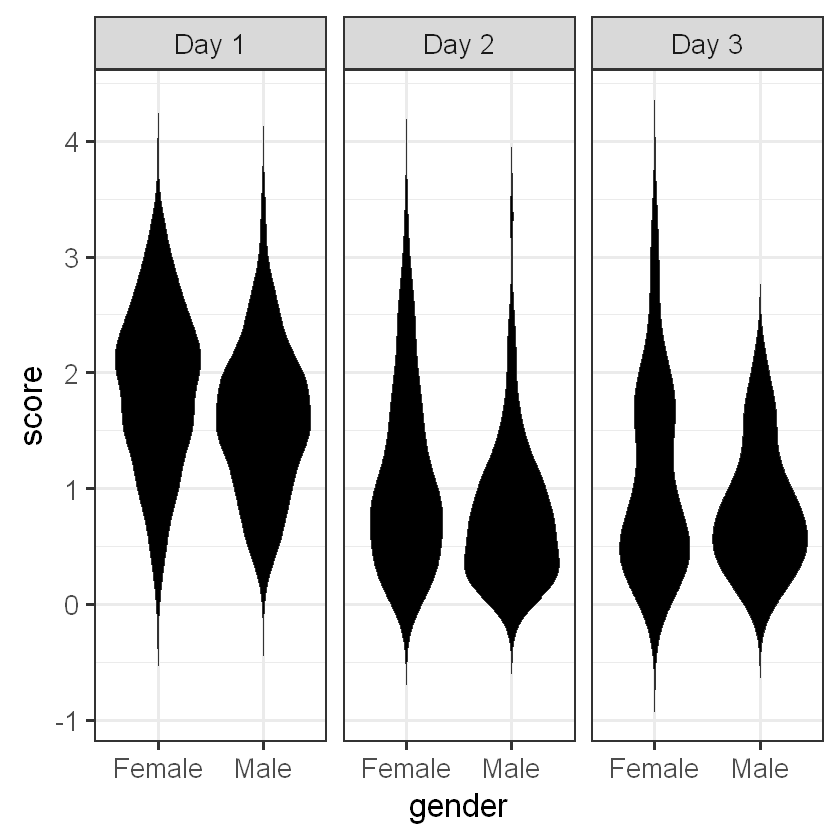

In [74]:
#We've done this before
facet_labels <- c(
    'day1'="Day 1",
    'day2'="Day 2",
    'day3'="Day 3"
)
#Nothing new here!
ggplot(festival.data.stack.edit, aes(x=gender, y=score))+
    #trim is just a visual thing; see the difference between TRUE and FALSE
    geom_violin(trim=F,fill="black")+
    facet_grid(~day, labeller=labeller(day=facet_labels))+
    theme_bw(base_size=20)


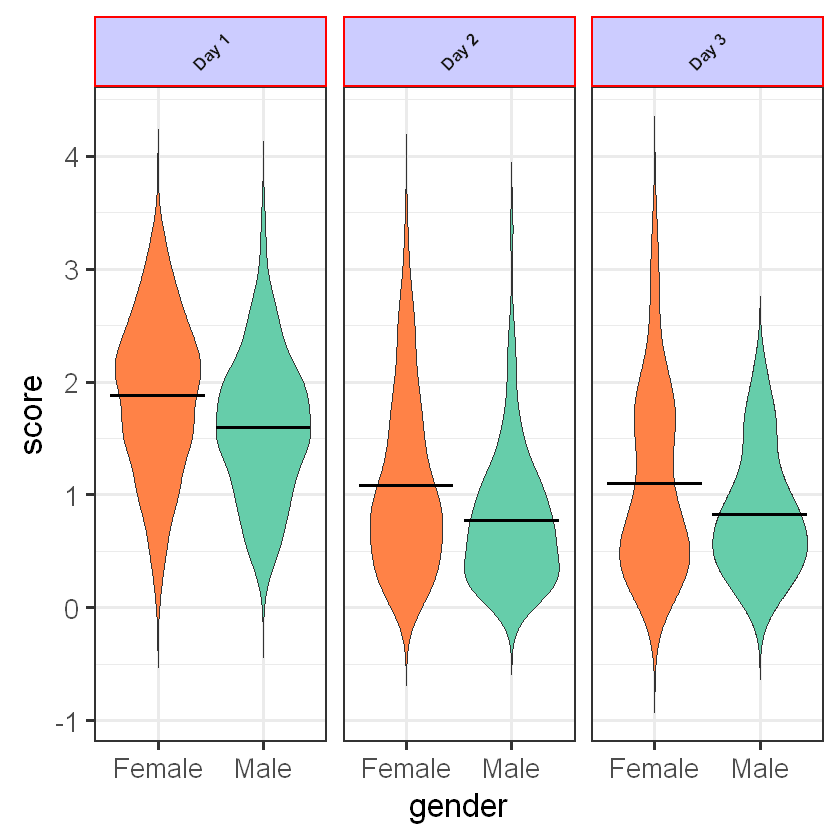

In [75]:
#A more involved visualization
#Even more fun, google ggplot rainclouds

ggplot(festival.data.stack.edit, aes(x=gender,y=score,fill=gender))+
    geom_violin(trim=FALSE)+
    facet_grid(~day, labeller=labeller(day=facet_labels))+
    theme_bw(base_size=20)+
    theme(
        strip.text.x = element_text(size=10, angle=45, face="bold"),
        strip.background = element_rect(colour="red", fill="#CCCCFF")
    )+
    stat_summary(
        fun.y=mean,
        aes(ymin=..y.., ymax=..y..),
        geom="errorbar",
        width=0.9,
        size=1,
        color="black"
    )+
    scale_fill_manual(values=c("sienna1", "aquamarine3"))+
    guides(fill=F)

In [79]:
#One last walk through on a plot type then, I'll go through a couple "Advanced" plots

library(dplyr)

#If you haven't looked at the data wrangling with dplyr notebook,
#these lines of code aren't going to make a lot of sense, sadly

#You should look at the data wrangling notes first, but:
#I've calculated the mean and standard error of the mean per gender per day
#and made a new data.frame out of it
#(Actually, it's a tibble, but think of it as a data.frame)
festival.data.stack.edit %>%
    group_by(gender, day) %>%
    summarise(
        mean=mean(score),
        sem=sd(score) / sqrt(n())
    ) -> score.sem

head(score.sem)

gender,day,mean,sem
<fct>,<fct>,<dbl>,<dbl>
Female,day1,1.8787273,0.03164061
Female,day2,1.0828750,0.06077612
Female,day3,1.0997015,0.09895861
Male,day1,1.6020635,0.03619580
Male,day2,0.7732692,0.05847218
Male,day3,0.8291071,0.07209944


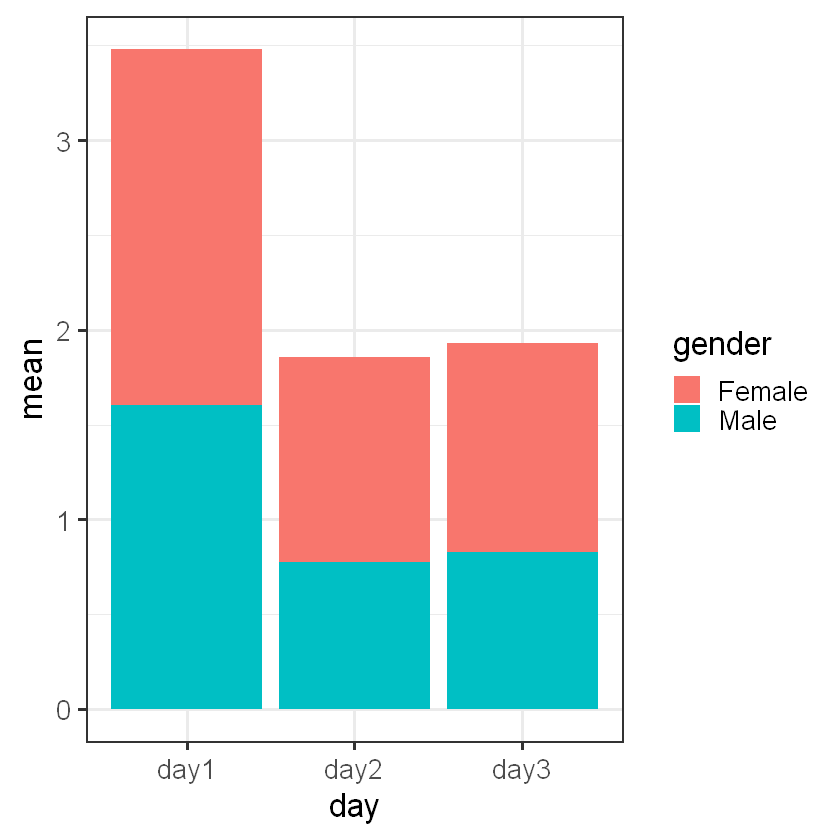

In [81]:
#An obvious visualization I've not show you is a bar graph
#So, here we go!

#bar graphs are weird in ggplot
#Default behavior is to sort of act like a histogram
#you provide an x aesthetic and then it outputs the y-value as count data
#You can override this behavior by passing stat="identity" into geom_bar
#that means the y value will be whatever you pass into aes()
#See below

ggplot(score.sem, aes(day, mean, fill=gender))+
    geom_bar(stat="identity")+
    theme_bw(base_size=20)


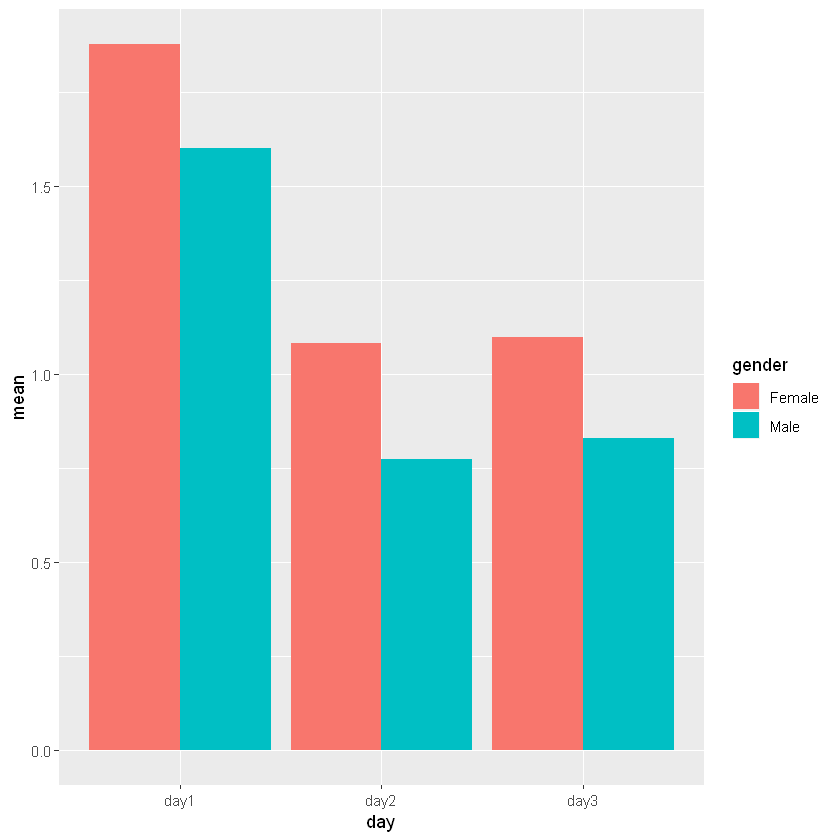

In [82]:
ggplot(score.sem, aes(x=day, y=mean, fill=gender))+
    #if you want the x values to have dodged positioning:
    geom_bar(position="dodge", stat="identity")


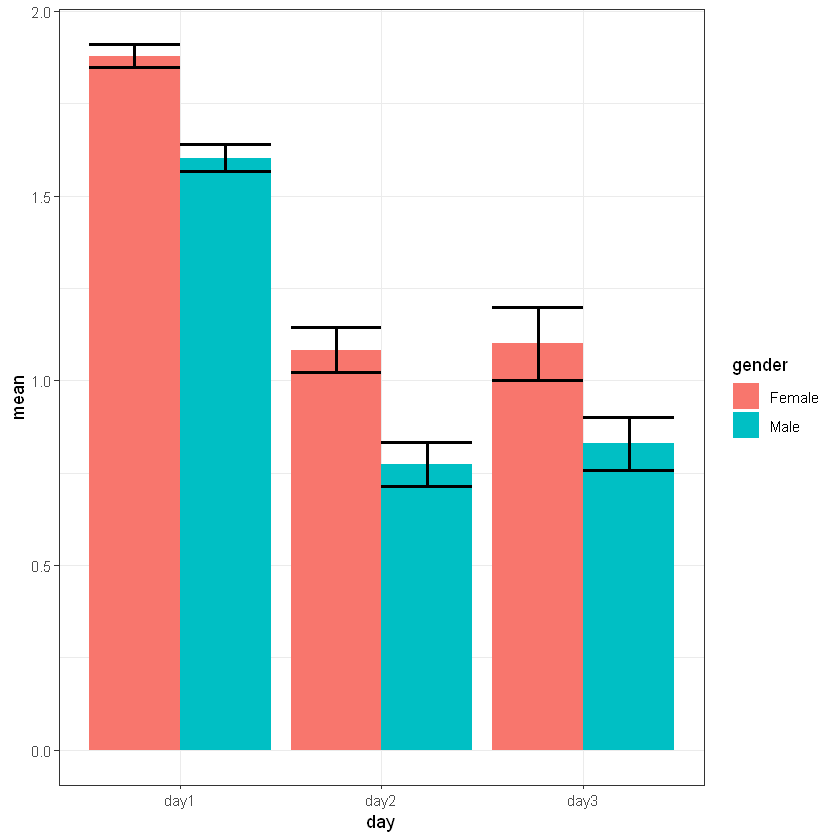

In [83]:
#Finally, let's use that sem column we calculated!

ggplot(score.sem, aes(x=day, y=mean, fill=gender))+
    #same as before
    geom_bar(position="dodge", stat="identity")+
    #using geom_errorbar to show mean +/- sem with ymin/ymax aes
    geom_errorbar(
        aes(ymin=mean-sem, ymax=mean+sem),
        position="dodge",
        size= 1
    )+
    theme_bw()


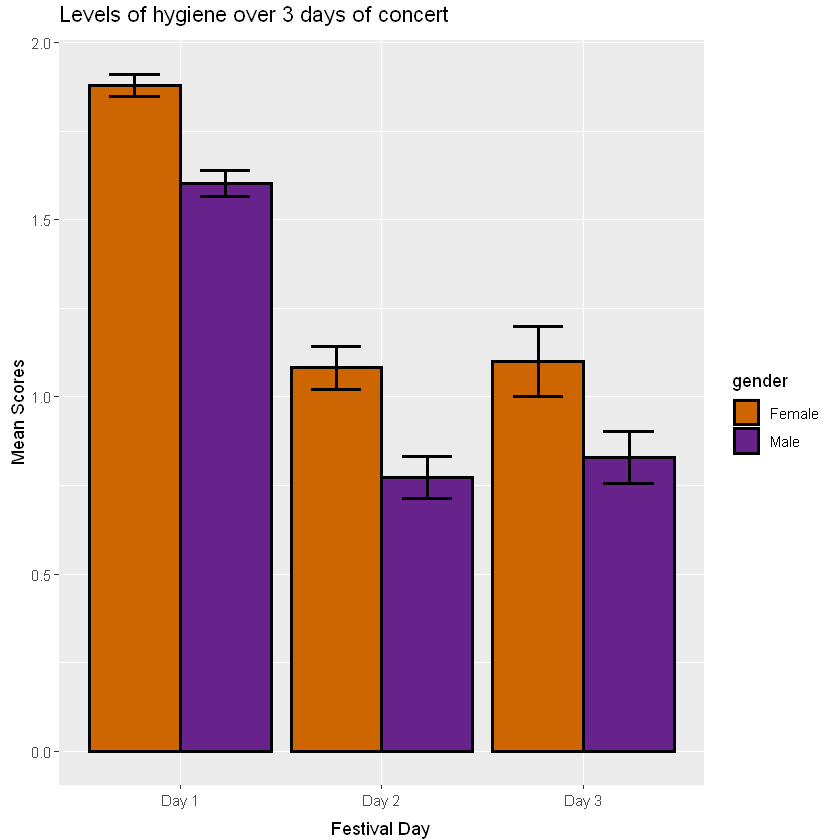

In [91]:
#No commenting here, see if you can figure out what everything means
#Obviously, please reach out if you have questions!

ggplot(score.sem, aes(day,mean, fill=gender))+
    geom_bar(
        position="dodge",
        colour="black",
        stat="identity",
        size=1
    )+
    geom_errorbar(
        aes(ymin=mean-sem, ymax=mean+sem),
        width=.5,
        position=position_dodge(width=0.9),
        size=1
    )+
    ylab("Mean Scores")+
    xlab("Festival Day")+
    ggtitle("Levels of hygiene over 3 days of concert")+
    scale_x_discrete(labels = c("Day 1", "Day 2", "Day 3"))+
    scale_fill_manual(values=c("darkorange3", "darkorchid4"))+
    theme(
        plot.title=element_text(vjust=+2),
        axis.title.x = element_text(vjust=-1)
    )